# Cleaning and Analyzing Employee Exit Surveys
## Introduction
In this project, we'll work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. The corresponding datasets can be found here: [DETE](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey) and [TAFE](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey). 

The aim  of this project is to find the answers to the following questions:

- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

To answer these questions, we are going to combine the results for both surveys. However, although both used the same survey template, one of them customized some of the answers. In addition, data dictionaries weren't provided with the datasets, so for the purposes of this project, we'll use our general knowledge to define the columns.
### Summary of Results
The main findings from this project are that the employees who worked longer in the institute / the older employees are more likely to resign because of dissatisfaction than those who worked for a shorter period / the younger employees, and that the percentage of dissatisfied employees from the DETE institute is twice higher than from the TAFE. 

## Data Downloading and Initial Data Exploration
We'll start by importing the Python libraries, reading the datasets into pandas and exploring them.

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Reading the datasets into pandas
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

### DETE Dataset Exploration

In [3]:
dete_survey.shape

(822, 56)

The DETE dataset counts 822 rows and 56 columns.

In [4]:
dete_survey.columns

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Professional Development',
       'Opportunities for promotion', 'Staff morale', 'Workplace issue',
       'Physical environment', 'Worklife balance',
       'Stress and pressure support', 'Performance of supervisor',
       'Peer support', 'Initiative', 'Skills', 'Coach', 'Career Aspirations',
       'Feedback', 'Further PD', 'Communication', 'My say', 'Inform

The definitions of the data for the majority of the columns is intuitively understandable from the column names. The style of column naming is not consistent: pascal case, title case, using "and" or &.

In [5]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

The most common data type in the dataset is string (object). The column `'ID'` has integer data type, all the others - boolean. About half of the columns contain missing values, up to more than 96% in the last 5 columns.

In [6]:
print(dete_survey.head(10))

   ID                    SeparationType Cease Date DETE Start Date  \
0   1             Ill Health Retirement    08/2012            1984   
1   2  Voluntary Early Retirement (VER)    08/2012      Not Stated   
2   3  Voluntary Early Retirement (VER)    05/2012            2011   
3   4         Resignation-Other reasons    05/2012            2005   
4   5                    Age Retirement    05/2012            1970   
5   6         Resignation-Other reasons    05/2012            1994   
6   7                    Age Retirement    05/2012            1972   
7   8                    Age Retirement    05/2012            1988   
8   9         Resignation-Other reasons    07/2012            2009   
9  10        Resignation-Other employer       2012            1997   

  Role Start Date                                      Position  \
0            2004                                Public Servant   
1      Not Stated                                Public Servant   
2            2011           

From here we can make some new observations.

- `'Cease Date'` is represented in at least 2 formats: mm/YYYY and YYYY.
- `'DETE Start Date'` and `'Role Start Date'` can have value "Not Stated", which practically means a missing value.
- The columns `'Kept informed'`, `'Wellness programs'`, and `'Health & Safety'` are presented in denotations, and we don't have any legend to decifer them. In addition, these columns don't look valuable for answering our questions, so most probably we'll have to delete them.

Let's not explore the "hidden" columns (from `'Employment Status'` to `'Kept informed'`, not inclusive).

In [7]:
# Exploring the "hidden" columns 
print(dete_survey.iloc[:5, 10:30])

   Career move to public sector  Career move to private sector  \
0                          True                          False   
1                         False                          False   
2                         False                          False   
3                         False                           True   
4                         False                          False   

   Interpersonal conflicts  Job dissatisfaction  \
0                    False                 True   
1                    False                False   
2                    False                False   
3                    False                False   
4                    False                False   

   Dissatisfaction with the department  Physical work environment  \
0                                False                      False   
1                                False                      False   
2                                False                      False   
3                   

Here almost all the columns are boolean and seem to be relevant to our analysis. The last 2 columns from this selection are again the same denotations without legend which we have seen before.

In [8]:
# Exploring the "hidden" columns
print(dete_survey.iloc[:5, 30:46])

  Staff morale Workplace issue Physical environment Worklife balance  \
0            N               N                    N                A   
1            N               N                    N                N   
2            N               N                    N                N   
3            N               N                    A                A   
4            N               N                    D                D   

  Stress and pressure support Performance of supervisor Peer support  \
0                           A                         A            A   
1                           A                         A            A   
2                           N                         N            N   
3                           N                         N            A   
4                           N                         A            A   

  Initiative Skills Coach Career Aspirations Feedback Further PD  \
0          N      N     N                  A        A          A  

We see that the rest of the "hidden" columns are the same denotations without legend. Apart from the fact that we don't know their meaning, they seem also irrelevant (or at least not in an explicit way) to our further analysis of dissatisfaction issues, so they are candidates to be deleted from the dataset.

Let's take a closer look at some columns, especially focusing on missing values.

In [9]:
dete_survey['Region'].value_counts(dropna=False)

Metropolitan                135
Central Office              130
South East                  108
Not Stated                  105
Darling Downs South West     95
Central Queensland           84
North Coast                  75
North Queensland             53
Far North Queensland         37
Name: Region, dtype: int64

We see that for the `'Region'` column missing values are represented by "Not Stated".

In [10]:
dete_survey['Business Unit'].value_counts(dropna=False)

NaN                                           696
Education Queensland                           54
Information and Technologies                   26
Training and Tertiary Education Queensland     12
Other                                          11
Human Resources                                 6
Corporate Strategy and Peformance               5
Early Childhood Education and Care              3
Policy, Research, Legislation                   2
Infrastructure                                  2
Calliope State School                           1
Pacific Pines SHS                               1
Finance                                         1
Corporate Procurement                           1
Indigenous Education and Training Futures       1
Name: Business Unit, dtype: int64

The `'Business Unit'` contains about 85% of missing values.

In [11]:
dete_survey['Employment Status'].value_counts(dropna=False)

Permanent Full-time    434
Permanent Part-time    308
Temporary Full-time     41
Temporary Part-time     24
Casual                  10
NaN                      5
Name: Employment Status, dtype: int64

The most common value of `'Employment Status'` is "Permanent Full-time", followed by "Permanent Part-time", altogether amounting to 90% of all the values.

In [12]:
# Finding the number of missing values per column
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

Apart from the above-mentioned last 5 columns (`'Aboriginal'`, `'Torres Strait'`, `'South Sea'`, `'Disability'`, `'NESB'`), almost totally consisting of missing values, the other columns with high percentage of missing values are `'Business Unit'` (85%), `'Classification'` (45%), `'Opportunities for promotion'` (11%), and `'Career Aspirations'` (9%).
### TAFE Dataset Exploration
Now we'll take a look at the second dataset.

In [13]:
tafe_survey.shape

(702, 72)

The TAFE dataset counts 702 rows and 72 columns.

In [14]:
tafe_survey.columns

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Main Factor. Which of these was the main factor for leaving?',
       'InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction',
       'InstituteViews. Topic:2. I was given access to skills training to help me do my job better',
       'InstituteViews. Topic:3. I was given adequate oppo

The column names are too wordy and hardly comprehensible. The style of column naming is very mixed: pascal case, upper case, title case, long questions, subheadings, punctuation marks. Many of the column names representing the questions of the survey are repetitive or too detailed.

In [15]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

The most common data type in the dataset is string (object). The `'Record ID'` and `'CESSATION YEAR'` columns are float. Almost all the columns contain missing values, up to 84% (`'Main Factor...'`).

In [16]:
print(tafe_survey.head(10))

      Record ID                              Institute  \
0  6.341330e+17  Southern Queensland Institute of TAFE   
1  6.341337e+17            Mount Isa Institute of TAFE   
2  6.341388e+17            Mount Isa Institute of TAFE   
3  6.341399e+17            Mount Isa Institute of TAFE   
4  6.341466e+17  Southern Queensland Institute of TAFE   
5  6.341475e+17  Southern Queensland Institute of TAFE   
6  6.341520e+17         Barrier Reef Institute of TAFE   
7  6.341537e+17  Southern Queensland Institute of TAFE   
8  6.341579e+17  Southern Queensland Institute of TAFE   
9  6.341588e+17         Barrier Reef Institute of TAFE   

                   WorkArea  CESSATION YEAR Reason for ceasing employment  \
0  Non-Delivery (corporate)          2010.0              Contract Expired   
1  Non-Delivery (corporate)          2010.0                    Retirement   
2       Delivery (teaching)          2010.0                    Retirement   
3  Non-Delivery (corporate)          2010.0          

Some preliminary observations at this stage:

- `'Record ID'` is represented by quite big numbers.
- `'CESSATION YEAR'` is float.
- At many questions of the survey was replied "yes", or the question was omitted.

Let's take a  closer look at some of the columns.

In [17]:
tafe_survey['WorkArea'].value_counts(dropna=False)

Non-Delivery (corporate)    432
Delivery (teaching)         270
Name: WorkArea, dtype: int64

There are only 2 categories in `'WorkArea'`.

In [18]:
tafe_survey['Reason for ceasing employment'].value_counts(dropna=False)

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
NaN                           1
Name: Reason for ceasing employment, dtype: int64

The most common reason for leaving the institute is resignation.

In [19]:
tafe_survey['Contributing Factors. Career Move - Public Sector '].value_counts(dropna=False)

-                              375
NaN                            265
Career Move - Public Sector     62
Name: Contributing Factors. Career Move - Public Sector , dtype: int64

In [20]:
tafe_survey['Contributing Factors. Career Move - Self-employment'].value_counts(dropna=False)

-                                420
NaN                              265
Career Move - Self-employment     17
Name: Contributing Factors. Career Move - Self-employment, dtype: int64

The group of columns with the names starting with  `'Contributing Factors...'` practically shows if the factor was the reason for leaving, or it was not so.

In [21]:
tafe_survey['Main Factor. Which of these was the main factor for leaving?'].value_counts(dropna=False)

NaN                                         589
Dissatisfaction with %[Institute]Q25LBL%     23
Job Dissatisfaction                          22
Other                                        18
Career Move - Private Sector                 16
Interpersonal Conflict                        9
Career Move - Public Sector                   8
Maternity/Family                              6
Career Move - Self-employment                 4
Ill Health                                    3
Travel                                        2
Study                                         2
Name: Main Factor. Which of these was the main factor for leaving?, dtype: int64

This column was supposed to be a generalization of the above-mentioned group of columns with contributing factors, but indeed it has very few values. We see that even the numbers of answers in the `'Contributing factors...'` columns don't correspond to those in this one. It seems that the respondents felt tired to reply the repetitive questions, or just found it redundant. Probably it would have been more efficient for the dataset, and more informative for the survey itself, to keep only this question in the survey, where people could directly choose the reason for leaving the institute.

In [22]:
tafe_survey['InstituteViews. Topic:3. I was given adequate opportunities for personal development'].value_counts()

Agree                247
Neutral              119
Strongly Agree       116
Disagree              72
Strongly Disagree     43
Not Applicable        13
Name: InstituteViews. Topic:3. I was given adequate opportunities for personal development, dtype: int64

In [23]:
tafe_survey['WorkUnitViews. Topic:30. Staff morale was positive within my work unit'].value_counts()

Agree                236
Neutral              119
Strongly Agree       104
Strongly Disagree     70
Disagree              69
Not Applicable         8
Name: WorkUnitViews. Topic:30. Staff morale was positive within my work unit, dtype: int64

The columns above (and all the other columns representing the survey questions) show the same structure of possible answers for each question. The majority of answers are positive. We can also assume that those denotations without leggend for the DETE dataset have exactly the same meanings:

In [24]:
dete_survey['Kept informed'].value_counts()

A     401
SA    162
N     130
D      60
SD     50
M      10
Name: Kept informed, dtype: int64

Despite now we found the meanings, both those columns of the DETE dataset and the columns representing the survey questions in the TAFE dataset have to be dropped, since they don't give any explicit value for our further analysis.

In [25]:
tafe_survey['Employment Type. Employment Type'].value_counts(dropna=False)

Permanent Full-time    237
Temporary Full-time    177
NaN                    106
Contract/casual         71
Permanent Part-time     59
Temporary Part-time     52
Name: Employment Type. Employment Type, dtype: int64

The most common categories of employment type for the TAFE are "Permanent Full-time" and "Temporary Full-time".

In [26]:
# Finding the number of missing values per column
tafe_survey.isnull().sum()

Record ID                                                                                                                                                          0
Institute                                                                                                                                                          0
WorkArea                                                                                                                                                           0
CESSATION YEAR                                                                                                                                                     7
Reason for ceasing employment                                                                                                                                      1
Contributing Factors. Career Move - Public Sector                                                                                                                265
Contributi

We can observe that the majority of columns contain a high percentage of missing values, with `'Main Factor...'` most of all. Judging by an obvious pattern in missing values for the `'Contributing Factors...'` columns (265 missing values in each), some people most probably just ignored this group of columns and replied directly in `'Main Factor...'`, some other respondents did just the opposite, and the others ignored both `'Contributing Factors...'` and `'Main Factor...'`.
## Data Cleaning
### Transforming "Not Stated " in NaN 
As we noticed earlier, the DETE dataset contains "Not Stated" values that indicate missing values, but not represented as NaN. Let's re-read the dataset and fix this issue.

In [27]:
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')

### Dropping  Unnecessary Columns
We have already identified the columns that we won't use in our analysis: the last 5 columns and the columns with denotations for the DETE dataset (from `'Professional Development'` to `'Health & Safety'`, both inclusive) and those representing the survey questions for the TAFE dataset. For the last one, we'll delete also the `'Main Factor...'` column, containing 84% of missing values. Hence, for TAFE dataset we'll delete all the columns from `'Main Factor...'` to `'Workplace. Topic:Would you recommend the Institute as an employer to others?'` both inclusive.

First, we have to find the indices of these columns.

In [28]:
# Finding the column indices
print(dete_survey.columns.get_loc('Professional Development'))
print(dete_survey.columns.get_loc('Health & Safety'))

28
48


In [29]:
# Finding the column indices
print(tafe_survey.columns.get_loc('Main Factor. Which of these was the main factor for leaving?'))
print(tafe_survey.columns.get_loc('Workplace. Topic:Would you recommend the Institute as an employer to others?'))

17
65


Now we'll drop the columns between these indices from the corresponding datasets and also the last 5 columns of the DETE dataset.

In [30]:
# Dropping the unnecessary columns
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
dete_survey_updated = dete_survey_updated.drop(dete_survey.columns[-5:], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

In [31]:
dete_survey_updated.columns

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age'],
      dtype='object')

In [32]:
tafe_survey_updated.columns

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender. What is your Gender?', 'CurrentAge. Current Age',
       'Employment Type. Employment Type', 'Classification. Classification',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)'],
      dtype='ob

In [33]:
# Checking the updated column number
print('DETE, number of columns: ', dete_survey_updated.shape[1])
print('TAFE, number of columns: ', tafe_survey_updated.shape[1])

DETE, number of columns:  30
TAFE, number of columns:  23


Now we significantly reduced the number of columns for both datasets, leaving ony the most relevant columns.
### Cleaning Column Names
Next, let's turn our attention to the column names. Each dataframe contains many of the same columns, but with different names:

| dete_survey | tafe_survey | Definition |
| --- | --- | --- |
| ID | Record ID | An id used to identify the participant of the survey |
| SeparationType | Reason for ceasing employment | The reason why the participant's employment ended |
| Cease Date | CESSATION YEAR | The year or month the participant's employment ended |
| DETE Start Date |  | The year the participant began employment with the DETE |
|  | LengthofServiceOverall. Overall Length of Service at Institute (in years) | The length of the person's employment (in years) |
| Age | CurrentAge. Current Age | The age of the participant |
| Gender | Gender. What is your Gender? | The gender of the participant |

Because we eventually want to combine the datasets, we'll have to standardize the column names. Let's start with the DETE dataset.

In [34]:
# Renaming the DETE dataset columns
dete_survey_updated.columns = dete_survey_updated.columns.str.strip().str.lower().str.replace(' ', '_')
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age'],
      dtype='object')

Now the column names of the DETE dataset look much tidier. The only thing to fix is the column name  of `'separationtype'`.

In [35]:
# Renaming the 'separationtype' column
dete_survey_updated.rename({'separationtype': 'separation_type'}, axis=1, inplace=True)

Our next step is to handle the column names of the TAFE dataset and give them the same names as in the first dataset..

In [36]:
# Renaming the TAFE dataset columns
column_names_dict = {'Record ID': 'id', 'CESSATION YEAR': 'cease_date', 'Reason for ceasing employment': 'separation_type', 
                     'Gender. What is your Gender?': 'gender', 'CurrentAge. Current Age': 'age', 'Employment Type. Employment Type': 'employment_status',
                     'Classification. Classification': 'position', 'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service', 
                     'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}

tafe_survey_updated.rename(column_names_dict, axis=1, inplace=True)

In [37]:
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separation_type',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

For now, we renamed only general columns (age, gender, etc). Those ones related to dissatisfaction issues we'll handle later.
### Filtering Resigned Employees
Since for the purposes of this project we're interested only in those people who _resigned_, we have to filter both datasets to leave only the rows with the separation type assigned as "Resignation".

In [38]:
dete_survey_updated['separation_type'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separation_type, dtype: int64

In [39]:
tafe_survey_updated['separation_type'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separation_type, dtype: int64

We see that for the DETE dataset there are 3 types of resignation, while for the TAFE only 1.

In [40]:
# Filtering the DETE dataset on the resignation separation types
dete_resignations = dete_survey_updated.copy()
dete_resignations = dete_resignations[(dete_resignations['separation_type'] == 'Resignation-Other reasons') |
                                      (dete_resignations['separation_type'] == 'Resignation-Other employer') |
                                      (dete_resignations['separation_type'] == 'Resignation-Move overseas/interstate')]

# Filtering the TAFE dataset on the resignation separation type
tafe_resignations = tafe_survey_updated.copy()
tafe_resignations = tafe_resignations[tafe_resignations['separation_type'] == 'Resignation']

# Resetting indices
dete_resignations.reset_index(drop=True, inplace=True)
tafe_resignations.reset_index(drop=True, inplace=True)

# Calculating the number of rows in the filtered datasets
print(dete_resignations.shape[0])
print(tafe_resignations.shape[0])

311
340


After filtering, the number of rows in both datasets was reduced more than twice.
### Verifying the Data
Let's verify that the data doesn't contain any major inconsistencies (to the best of our knowledge). 

We'll focus on verifying that the years in the `'cease_date'`, `'role_start_date'`, and `'dete_start_date'` columns make sense. 

- The years should be at least before the current date.
- Given that most people start working in their 20s, it's also unlikely that the `'dete_start_date'` was before the year 1940.

If we have many years higher than the current date or lower than 1940, we wouldn't want to continue with our analysis, because it could mean there's something very wrong with the data. If there are few such values, we can remove them.

In [41]:
dete_resignations['cease_date'].value_counts().sort_index(ascending=True)

01/2014     22
05/2012      2
05/2013      2
06/2013     14
07/2006      1
07/2012      1
07/2013      9
08/2013      4
09/2010      1
09/2013     11
10/2013      6
11/2013      9
12/2013     17
2010         1
2012       126
2013        74
Name: cease_date, dtype: int64

Fisrt, we have to extract the years for this column and then convert it to float.

In [42]:
# Extracting the years and converting the column to float
dete_resignations['cease_date'] = dete_resignations['cease_date'].str[-4:].astype(float)
dete_resignations['cease_date'].value_counts().sort_index(ascending=True)

2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: cease_date, dtype: int64

In [43]:
dete_resignations['dete_start_date'].value_counts().sort_index(ascending=True)

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

In [44]:
dete_resignations['role_start_date'].value_counts().sort_index(ascending=True)

200.0      1
1976.0     2
1980.0     1
1982.0     1
1986.0     1
1987.0     2
1988.0     3
1989.0     5
1990.0     1
1991.0     1
1992.0     4
1993.0     3
1994.0     2
1996.0     3
1997.0     5
1998.0     4
1999.0     6
2000.0     1
2001.0     2
2002.0     7
2003.0     6
2004.0    10
2005.0     9
2006.0     7
2007.0    24
2008.0    21
2009.0    18
2010.0    27
2011.0    33
2012.0    37
2013.0    24
Name: role_start_date, dtype: int64

In [45]:
tafe_resignations['cease_date'].value_counts().sort_index(ascending=True)

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

It seems that there is an issue with the `'role_start_date'` column of the DETE dataset: the minimum year is 200! All the other date columns in both datasets don't show any anomaly: the minimum value is 1963 (i.e. much later than 1940), the maximum is 2014 (this is also ok, since both datasets were created in 2014).

Let's have a look at the other values in the row with the anomalous role start year.

In [46]:
# Slicing through the columns of the row with the anomalous value 
dete_resignations[dete_resignations['role_start_date'] == 200].iloc[:5, :15]

,id,separation_type,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department
137,391,Resignation-Other employer,2013.0,2000.0,200.0,Teacher,Secondary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False


In [47]:
# Slicing through the columns of the row with the anomalous value 
dete_resignations[dete_resignations['role_start_date'] == 200].iloc[:5, 15:]

,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age
137,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,46-50


We can observe that this person didn't have any dissatisfaction issues and left the institute only because of moving to private sector. So this row won't be of use for our analysis, and we can just drop it. 

In [48]:
# Dropping the row with the anomalous value
dete_resignations.drop(dete_resignations.index[137], inplace=True)

# Checking the number of rows afterwards
dete_resignations.shape[0]

310

Let's visuaize all the 3 date columns of the DETE dataseet to check once again their consistency.

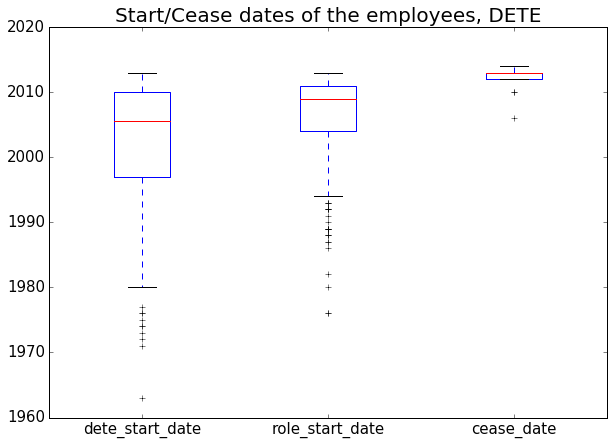

In [49]:
%matplotlib inline

# Creating boxplots for the date columns of the DETE dataset
dete_resignations[['dete_start_date', 'role_start_date', 'cease_date']].plot(kind='box', figsize=(10, 7),  fontsize=15)
plt.title('Start/Cease dates of the employees, DETE', fontsize=20)

Now everything makes sense: year ranges are ok for all the 3 columns, some people changed their role in the institute (were promoted, most probably) after being assumed, some people left the institute (mostly after 2010).
### Calculating Institute Service
For answering one of our questions in interest, we need to know the years of service for each employee (the length of time an employee spent in a workplace). In the TAFE dataset, we have this information in the `'institute_service'` column. Let’s calculate the same column for the DETE dataset.

In [50]:
dete_resignations['dete_start_date'].unique()

array([2005., 1994., 2009., 1997., 1998., 2007.,   nan, 1982., 1980.,
       1973., 1995., 2003., 2006., 2011., 1977., 1974., 1976., 1993.,
       2008., 1986., 2002., 2004., 2010., 2012., 1989., 1999., 1996.,
       2000., 1991., 1992., 2001., 1988., 1990., 1985., 1963., 2013.,
       1972., 1983., 1971., 1984., 1975., 1987.])

In [51]:
# Calculating the 'institute_service' column
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

Let's now  take a look at the `'institute_service'` column in both datasets.

In [52]:
dete_resignations['institute_service'].value_counts().sort_index(ascending=True)

0.0     20
1.0     22
2.0     14
3.0     20
4.0     16
5.0     23
6.0     17
7.0     13
8.0      8
9.0     14
10.0     6
11.0     4
12.0     6
13.0     7
14.0     6
15.0     7
16.0     5
17.0     6
18.0     5
19.0     3
20.0     7
21.0     3
22.0     6
23.0     4
24.0     4
25.0     2
26.0     2
27.0     1
28.0     2
29.0     1
30.0     2
31.0     1
32.0     3
33.0     1
34.0     1
35.0     1
36.0     2
38.0     1
39.0     3
41.0     1
42.0     1
49.0     1
Name: institute_service, dtype: int64

We can notice that 20 employees worked in the DETE institute less than one year, 22 employees - 1 year. They are a target audience for our question: the employees who have only worked for the institute for a short period of time.

Let's see the same column divided in equal groups of years.

In [53]:
dete_resignations['institute_service'].value_counts(bins=5)

(-0.05, 9.8]    167
(9.8, 19.6]      55
(19.6, 29.4]     32
(29.4, 39.2]     15
(39.2, 49.0]      3
Name: institute_service, dtype: int64

The majority of people worked in the DETE institute up to 10 years. 

Let's now take a look at the TAFE institute's workers.

In [54]:
tafe_resignations['institute_service'].value_counts(dropna=False)

Less than 1 year      73
1-2                   64
3-4                   63
NaN                   50
5-6                   33
11-20                 26
7-10                  21
More than 20 years    10
Name: institute_service, dtype: int64

In this column the values are given in ranges of years. We see that 25% of all the employees for whom the information about their years of service is available (i.e. excluding NaN) worked in the institute less than 1 year, 47% - 1-2 years. Hence, in the TAFE institute more people resigned after a short period of time.
### Cleaning the Age Column
To answer our second question, we have to clean first the `'age'` column for both datasets.

In [55]:
dete_resignations['age'].value_counts(dropna=False).sort_index(ascending=True)

20 or younger     1
21-25            29
26-30            35
31-35            29
36-40            41
41-45            48
46-50            41
51-55            32
56-60            26
61 or older      23
NaN               5
Name: age, dtype: int64

In [56]:
tafe_resignations['age'].value_counts(dropna=False).sort_index(ascending=True)

20 or younger     9
21  25           33
26  30           32
31  35           32
36  40           32
41  45           45
46  50           39
51-55            39
56 or older      29
NaN              50
Name: age, dtype: int64

The age ranges are the same in both datasets, only that in the DETE dataset there are the ranges "56-60" and "61 or older", while in the TAFE dateset they are included in the range "56 or older". Since we're going to combine both datasets and analyze all the data together, we'll merge those 2 ranges also for the DETE dataset, to avoid bias.

In [57]:
# Combining the ranges "56-60" and "61 or older"
dete_resignations['age'] = dete_resignations['age'].str.replace('56-60', '56 or older').str.replace('61 or older', '56 or older')

Another issue to be resolved is different formats of age ranges between the datasets. Let's standardize them, following the example of the DETE dataset: 2 values divided by a hyphen.

In [58]:
tafe_resignations['age'] = tafe_resignations['age'].str.replace('  ', '-')

Let's inspect again the values of both `'age'` columns after introducing our modifications.

In [59]:
dete_resignations['age'].value_counts(dropna=False).sort_index(ascending=True)

20 or younger     1
21-25            29
26-30            35
31-35            29
36-40            41
41-45            48
46-50            41
51-55            32
56 or older      49
NaN               5
Name: age, dtype: int64

In [60]:
tafe_resignations['age'].value_counts(dropna=False).sort_index(ascending=True)

20 or younger     9
21-25            33
26-30            32
31-35            32
36-40            32
41-45            45
46-50            39
51-55            39
56 or older      29
NaN              50
Name: age, dtype: int64

Now both the format and the age ranges look identical for both datasets.
### Identifying Dissatisfied Employees
Next, we'll identify any employees who resigned because they were dissatisfied. For this purpose we'll use the columns from both dataset that contain reasons (the negative ones) for resigning. If the employee indicated any of them, we'll mark them as dissatisfied in a new column. For the DETE dataset such columns are: `
- `'job_dissatisfaction'`,
- `'dissatisfaction_with_the_department'`,
- `'physical_work_environment'`,
- `'lack_of_recognition'`,
- `'lack_of_job_security'`,
- `'work_location'`, 
- `'employment_conditions'`,
- `'work_life_balance'`, 
- `'workload'`. 

For the TAFE dataset they are:
- `'Contributing Factors. Dissatisfaction'`, 
- `'Contributing Factors. Job Dissatisfaction'`.

Let's take a look at the values of these columns.

In [61]:
dete_resignations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310 entries, 0 to 310
Data columns (total 31 columns):
id                                     310 non-null int64
separation_type                        310 non-null object
cease_date                             299 non-null float64
dete_start_date                        282 non-null float64
role_start_date                        270 non-null float64
position                               307 non-null object
classification                         160 non-null object
region                                 264 non-null object
business_unit                          32 non-null object
employment_status                      306 non-null object
career_move_to_public_sector           310 non-null bool
career_move_to_private_sector          310 non-null bool
interpersonal_conflicts                310 non-null bool
job_dissatisfaction                    310 non-null bool
dissatisfaction_with_the_department    310 non-null bool
physical_work_envir

For the DETE dataset all these columns are boolean, so they don't need additional modifications for creating the `'dissatisfied'` column. Let's look instead at the TAFE dataset information.

In [62]:
tafe_resignations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 23 columns):
id                                                     340 non-null float64
Institute                                              340 non-null object
WorkArea                                               340 non-null object
cease_date                                             335 non-null float64
separation_type                                        340 non-null object
Contributing Factors. Career Move - Public Sector      332 non-null object
Contributing Factors. Career Move - Private Sector     332 non-null object
Contributing Factors. Career Move - Self-employment    332 non-null object
Contributing Factors. Ill Health                       332 non-null object
Contributing Factors. Maternity/Family                 332 non-null object
Contributing Factors. Dissatisfaction                  332 non-null object
Contributing Factors. Job Dissatisfaction              332 non-null 

Here the columns in interest are strings, so they need first to be converted to boolean.

In [63]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False)

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [64]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False)

-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

We see that "-" practically means False (satisfied), while the other string value - True (dissatisfied). Given that, let's update the column values.

In [65]:
# Creating a function to convert strings to boolean
def update_vals(val):
    if pd.isnull(val):
        return np.nan
    elif val == '-':
        return False
    return True

# Converting strings to boolean
tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals) 

Now all the columns related to the dissatisfaction factors in both datasets are in boolean, and we can generalize this information in one column `'dissatisfied'`.

In [66]:
# Creating a list of columns for the DETE dataset
dete_columns_to_convert = ['job_dissatisfaction', 'dissatisfaction_with_the_department', 
                           'physical_work_environment', 'lack_of_recognition', 'lack_of_job_security', 
                           'work_location', 'employment_conditions', 'work_life_balance', 'workload']

# Creating a list of columns for the TAFE dataset
tafe_columns_to_convert = ['Contributing Factors. Dissatisfaction', 
                           'Contributing Factors. Job Dissatisfaction']

# Creating the 'dissatisfied' column in both datasets
dete_resignations['dissatisfied'] = dete_resignations[dete_columns_to_convert].any(axis=1, skipna=False)
tafe_resignations['dissatisfied'] = tafe_resignations[tafe_columns_to_convert].any(axis=1, skipna=False)

### Keeping Only Relevant Columns
After cleaning the data and gathering all the dissatisfaction factors in one column, we don't need anymore so many columns in each dataset to proceed with our analysis. Let's take a look once again at the column names and decide which of them to keep.

In [67]:
dete_resignations.columns

Index(['id', 'separation_type', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'institute_service',
       'dissatisfied'],
      dtype='object')

In [68]:
tafe_resignations.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separation_type',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service', 'dissatisfied'],
      dtype='object')

It seems that there are very few columns in each dataframe that represent any potential interest (at least as a reference) for further analysis. Let's create copies of the dataframes containing only those columns to avoid confusion.

In [69]:
# Creating lists of columns to keep
defe_columns_to_keep = ['id', 'cease_date', 'position', 'region', 'employment_status', 'gender', 'age', 'institute_service', 
                        'dissatisfied']
tafe_columns_to_keep = ['id', 'WorkArea', 'cease_date', 'gender',  'age', 'employment_status', 'position', 
                        'institute_service', 'dissatisfied']

# Copying dataframes only with the selected columns
dete_resignations_up = dete_resignations[defe_columns_to_keep].copy()
tafe_resignations_up = tafe_resignations[tafe_columns_to_keep].copy()

In [70]:
dete_resignations_up.columns

Index(['id', 'cease_date', 'position', 'region', 'employment_status', 'gender',
       'age', 'institute_service', 'dissatisfied'],
      dtype='object')

In [71]:
tafe_resignations_up.columns

Index(['id', 'WorkArea', 'cease_date', 'gender', 'age', 'employment_status',
       'position', 'institute_service', 'dissatisfied'],
      dtype='object')

### Combining the Data
Now, we'll combine our datasets. Our goal is to aggregate the data according to the `'institute_service'` column for answering the first question and then according to the `'age'` column for the second one.

First, we'll add a column `'institute'` to each dataframe and then we'll combine both dataframes.

In [72]:
# Addig the 'institute' columns
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

# Combining the dataframes
combined = pd.concat([dete_resignations_up, tafe_resignations_up])

In [73]:
combined.columns

Index(['WorkArea', 'age', 'cease_date', 'dissatisfied', 'employment_status',
       'gender', 'id', 'institute', 'institute_service', 'position', 'region'],
      dtype='object')

### Categorizing the Institute Service Column
Let's check the values of the `'institute_service'` column after combining our dataframes.

In [74]:
combined['institute_service'].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
15.0                   7
20.0                   7
13.0                   7
12.0                   6
22.0                   6
17.0                   6
14.0                   6
10.0                   6
18.0                   5
16.0                   5
23.0                   4
11.0                   4
24.0                   4
39.0                   3
32.0                   3
21.0                   3
19.0                   3
26.0                   2
28.0                   2
30.0                   2
25.0                   2
36.0                   2
27.0                   1


We see that this column currently contains values in different formats. To analyze the data, we'll categorize these values in a unique format according to the following definitions:

- New: Less than 3 years at a company
- Experienced: 3-6 years at a company
- Established: 7-10 years at a company
- Veteran: 11 or more years at a company

We'll start by extracting the years of service from each value of the column

In [75]:
# Converting each value to string, extracting the years, and then converting to float
combined['institute_service'] = combined['institute_service'].astype('str').str.extract(r'(\d+)', expand=True).astype('float')

# Checking the updated values
combined['institute_service'].value_counts()

1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
8.0       8
13.0      7
15.0      7
10.0      6
14.0      6
22.0      6
17.0      6
12.0      6
16.0      5
18.0      5
23.0      4
24.0      4
39.0      3
19.0      3
21.0      3
32.0      3
28.0      2
26.0      2
36.0      2
25.0      2
30.0      2
29.0      1
38.0      1
42.0      1
27.0      1
41.0      1
35.0      1
33.0      1
49.0      1
34.0      1
31.0      1
Name: institute_service, dtype: int64

Now, we'll map these years to the career stage categories.

In [76]:
# Creating a function for mapping values to the career stages
def service_category(val):
    if pd.isnull(val):
        return np.nan
    elif val < 3:
        return 'New'
    elif val <= 6:
        return 'Experienced'
    elif val <=10:
        return 'Established'
    else:
        return 'Veteran'

# Mapping the years to the career stages
combined['service_cat'] = combined['institute_service'].apply(service_category)

# Checking the values
combined['service_cat'].value_counts(dropna=False)

New            193
Experienced    172
Veteran        135
NaN             88
Established     62
Name: service_cat, dtype: int64

### Categorizing the Age Column
Now we'll apply the same categorization process to the `'age'` column. First, let's check the values of this column.

In [77]:
combined['age'].value_counts()

41-45            93
46-50            80
56 or older      78
36-40            73
51-55            71
26-30            67
21-25            62
31-35            61
20 or younger    10
Name: age, dtype: int64

We can divide these values into the following 3 categories:

- Junior: 30 y.o. or yonger
- Middle: 31-45 y.o.
- Senior: 46 y.o. or older

To do so, we have to extract the age from each value of the column.

In [78]:
# Converting each value to string, extracting the ages, and then converting to float
combined['age'] = combined['age'].str.extract(r'(\d+)', expand=True).astype('float')

# Checking the updated values
combined['age'].value_counts()

41.0    93
46.0    80
56.0    78
36.0    73
51.0    71
26.0    67
21.0    62
31.0    61
20.0    10
Name: age, dtype: int64

Now, we'll map these age values to the categories above, using a function similar to the one that we've used before.

In [79]:
# Creating a function for mapping values to the categories
def age_category(val):
    if pd.isnull(val):
        return np.nan
    elif val < 31:
        return 'Junior'
    elif val < 46:
        return 'Middle'
    else:
        return 'Senior'

# Mapping the age values to the age cetagories
combined['age_cat'] = combined['age'].apply(age_category)

# Checking the values
combined['age_cat'].value_counts(dropna=False)

Senior    229
Middle    227
Junior    139
NaN        55
Name: age_cat, dtype: int64

### Dealing with Missing Values
Our next step is to check how many missing values there're in the combined dataset and how they can be handled.

In [80]:
combined.shape

(650, 13)

In [81]:
combined.isnull().sum()

WorkArea             310
age                   55
cease_date            16
dissatisfied           8
employment_status     54
gender                59
id                     0
institute              0
institute_service     88
position              53
region               386
service_cat           88
age_cat               55
dtype: int64

We see that almost in all the columns there are missing values. 

- In the `'WorkArea'` and `'region'` columns there are about 50% of missing values, because both of them were present only in one of the datasets (DETE or TAFE). We can delete these columns without any consequences for our analysis.
- In the `'dissatisfied'` column, which is the key data for our analysis, there are 8 missing values (i.e. around 1% of all the values). We'll probably have to fill them.
- In the `'age'` (and `'age_cat'`) and `'institute_service'` (and `'service_cat'`) columns, which are the columns of our main interest we have quite a high percentage of missing values (8 and 14% correspondingly). We have to take a closer look at them and decide how to cope with them.
- In the rest of the columns we also have missing values, up to 9% in the `'gender'` column. However, since we kept these columns only as a reference data and we're not going to use them directly for our analysis, we can keep their missing values as they are.

First, we'll remove the unnecessary columns `'WorkArea'` and `'region'`.

In [82]:
# Deleting the unnecessary columns
combined = combined.drop(['WorkArea', 'region'], axis=1)

Now, we have to decide what to do with the `'dissatisfied'`  column. Let's look at its values.

In [83]:
combined['dissatisfied'].value_counts(dropna=False)

False    402
True     240
NaN        8
Name: dissatisfied, dtype: int64

The "False" value is definitely dominating in this column. Hence, given that there are only about 1% of missing values here, we can replace them with "False".

In [84]:
# Replacing missing values with False
combined['dissatisfied'] = combined['dissatisfied'].fillna(False)

# Checking the values
combined['dissatisfied'].value_counts(dropna=False)

False    410
True     240
Name: dissatisfied, dtype: int64

Next, we have to handle missing values in the `'service_cat'` and `'age_cat'` columns (we'll ignore the original `'institite_service'` and `'age'` columns and leave them only as a reference). Our approach will be to try to replace the missing values with the most frequent value of the column, or, alternatively, to figure it out of the other value if available (i.e. the service length from the age).

Let's take a look at the rows with the missing values  in the `'service_cat'` column.

In [85]:
combined[combined['service_cat'].isnull()]

,age,cease_date,dissatisfied,employment_status,gender,id,institute,institute_service,position,service_cat,age_cat
7,56.0,2012.0,True,Permanent Part-time,Male,1.700000e+01,DETE,NaN,Teacher Aide,NaN,Senior
17,21.0,2012.0,True,Permanent Full-time,Female,4.000000e+01,DETE,NaN,Teacher,NaN,Junior
37,46.0,2012.0,True,Temporary Part-time,Female,1.070000e+02,DETE,NaN,Teacher Aide,NaN,Senior
50,51.0,2012.0,False,Permanent Part-time,Female,1.410000e+02,DETE,NaN,Teacher Aide,NaN,Senior
62,46.0,2012.0,False,Permanent Part-time,Female,1.970000e+02,DETE,NaN,Teacher Aide,NaN,Senior
95,26.0,2013.0,True,Permanent Full-time,Female,2.890000e+02,DETE,NaN,Public Servant,NaN,Junior
96,56.0,2013.0,False,Permanent Part-time,Female,2.920000e+02,DETE,NaN,Teacher Aide,NaN,Senior
97,56.0,2012.0,False,Permanent Part-time,NaN,2.940000e+02,DETE,NaN,Schools Officer,NaN,Senior
101,46.0,2012.0,False,Permanent Part-time,Female,3.020000e+02,DETE,NaN,School Administrative Staff,NaN,Senior
117,41.0,2012.0,False,Permanent Part-time,Female,3.440000e+02,DETE,NaN,School Administrative Staff,NaN,Middle


We can notice that quite a lot of rows don't have neighter institute service nor age values to help us guess one value from another. Filling them just with the most frequent value is not correct, since we have too many missing values (14% for `'service_cat'` and 8% for `'age_cat'`). It seems that the best approach in this case is to drop these rows, since they don't give any additional value for answering our questions.

In [86]:
# Dropping the rows with missing values for both institute service and age 
combined.drop(combined[(combined['service_cat'].isnull()) & (combined['age_cat'].isnull())].index, inplace=True)

# Resetting the index
combined.reset_index(drop=True, inplace=True)

Now for each missing value of the `'service_cat'` column there's a value in the `'age_cat'` column, and vice versa. So we can fill the missing values of the `'service_cat'` column with regards to the `'age_cat'` column. However, there's one more factor to be considered to avoid a bias while finding the most frequent value: the institute (DETE or TAFE). Both institutes have quite a different distribution of the career stages, as we can see in the next 2 code cells.

In [87]:
combined[combined['institute'] == 'DETE']['service_cat'].value_counts(dropna=False)

Veteran        88
Experienced    66
New            44
Established    36
NaN            29
Name: service_cat, dtype: int64

In [88]:
combined[combined['institute'] == 'TAFE']['service_cat'].value_counts(dropna=False)

New            134
Experienced     96
Veteran         36
Established     21
Name: service_cat, dtype: int64

While in the DETE institute there are more "Veteran" employees, in the TAFE there are more "New". Hence, our next steps are the following:

- to find the most frequent values of the institute service for each combination "institute + age category" (eg. DETE & "Middle"),
- to fill the missing values of the `'service_cat'` column with the corresponding values.

In [89]:
# Specifying the conditions
dete_junior = (combined['institute'] == 'DETE') & (combined['age_cat'] == 'Junior')
dete_middle = (combined['institute'] == 'DETE') & (combined['age_cat'] == 'Middle')
dete_senior = (combined['institute'] == 'DETE') & (combined['age_cat'] == 'Senior')
tafe_junior = (combined['institute'] == 'TAFE') & (combined['age_cat'] == 'Junior')
tafe_middle = (combined['institute'] == 'TAFE') & (combined['age_cat'] == 'Middle')
tafe_senior = (combined['institute'] == 'TAFE') & (combined['age_cat'] == 'Senior')

# Printing out the most frequent values
print('The most frequent values of \'service_cat\':')
print('\n')
print('DETE+Junior: ', combined[dete_junior]['service_cat'].value_counts(dropna=False))
print('\n')
print('DETE+Middle: ', combined[dete_middle]['service_cat'].value_counts(dropna=False))
print('\n')
print('DETE+Senior: ', combined[dete_senior]['service_cat'].value_counts(dropna=False))
print('\n')
print('TAFE+Junior: ', combined[tafe_junior]['service_cat'].value_counts(dropna=False))
print('\n')
print('TAFE+Middle: ', combined[tafe_middle]['service_cat'].value_counts(dropna=False))
print('\n')
print('TAFE+Senior: ', combined[tafe_senior]['service_cat'].value_counts(dropna=False))

The most frequent values of 'service_cat':


DETE+Junior:  Experienced    24
New            20
Established     7
NaN             7
Name: service_cat, dtype: int64


DETE+Middle:  Veteran        30
Experienced    28
Established    18
New            16
NaN             7
Name: service_cat, dtype: int64


DETE+Senior:  Veteran        58
NaN            15
Experienced    14
Established    11
New             7
Name: service_cat, dtype: int64


TAFE+Junior:  New            44
Experienced    24
Established     4
Name: service_cat, dtype: int64


TAFE+Middle:  New            53
Experienced    37
Veteran        11
Established     8
Name: service_cat, dtype: int64


TAFE+Senior:  New            37
Experienced    35
Veteran        25
Established     9
Name: service_cat, dtype: int64


Now we'll use the resulting most frequent values to fill the missing values of the `'service_cat'` column.

In [90]:
# Filling the missing values of 'service_cat' with the corresponding most frequent values
combined.loc[dete_junior,'service_cat'] = combined.loc[dete_junior,'service_cat'].fillna('Experienced')
combined.loc[dete_middle,'service_cat'] = combined.loc[dete_middle,'service_cat'].fillna('Veteran')
combined.loc[dete_senior,'service_cat'] = combined.loc[dete_senior,'service_cat'].fillna('Veteran')
combined.loc[tafe_junior,'service_cat'] = combined.loc[tafe_junior,'service_cat'].fillna('New')
combined.loc[tafe_middle,'service_cat'] = combined.loc[tafe_middle,'service_cat'].fillna('New')
combined.loc[tafe_senior,'service_cat'] = combined.loc[tafe_senior,'service_cat'].fillna('New')

# Resetting the index
combined.reset_index(drop=True, inplace=True)

# Checking the results
print(combined['service_cat'].isnull().sum())

0


Hence, after our manupulations no missing values remained in the `'service_cat'` column. 

Let's now return to the `'age_cat'` column. 

In [91]:
combined[combined['age_cat'].isnull()]

,age,cease_date,dissatisfied,employment_status,gender,id,institute,institute_service,position,service_cat,age_cat
71,NaN,2012.0,False,Permanent Full-time,Female,286.0,DETE,0.0,Cleaner,New,NaN


We see that there's only one missing value remained (since we removed a lot of rows with both the `'service_cat'` and `'age_cat'` missing). We can fill it with the most frequent value of `'age_cat'` where the institute is the DETE and the career stage is "New".

In [92]:
# Specifying the conditions
dete_new = (combined['institute'] == 'DETE') & (combined['service_cat'] == 'New')

# Finding the most frequent value
combined[dete_new]['age_cat'].value_counts(dropna=False)

Junior    20
Middle    16
Senior     7
NaN        1
Name: age_cat, dtype: int64

So we'll fill the missing value of the `'age_cat'` column with the "Junior" age category.

In [93]:
# Filling the missing values of 'service_cat' with the corresponding most frequent values
combined.loc[dete_new,'age_cat'] = combined.loc[dete_new,'age_cat'].fillna('Junior')

# Resetting the index
combined.reset_index(drop=True, inplace=True)

# Checking the results
print(combined['age_cat'].isnull().sum())

0


Before proceeding with the data analysis, let's check the last time the missing values.

In [94]:
combined.isnull().sum()

age                   1
cease_date           11
dissatisfied          0
employment_status     2
gender                5
id                    0
institute             0
institute_service    29
position              2
service_cat           0
age_cat               0
dtype: int64

We see that in our columns of interest (`'dissatisfied'`, `'service_cat'`, and `'age_cat'`) there're no missing values left.
## Data Analysis
### Calculating the Percentage of Dissatisfied People per Career Stage
#### Overall trend
Having all the necessary data cleaned, we can calculate the fraction of dissatisfied employees who left the institute at different career stage, and sort the values in descending order. Then, to better understand the difference, we'll visualize the results.

             dissatisfied
service_cat              
Established      0.526316
Veteran          0.452055
Experienced      0.337278
New              0.297753


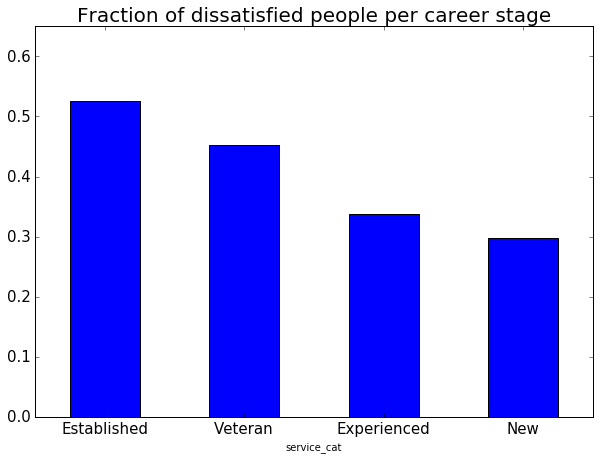

In [95]:
# Creating a pivot table 'dissatisfied_service'
dissatisfied_service = combined.pivot_table('dissatisfied', 'service_cat')['dissatisfied'].sort_values(ascending=False).to_frame()

# Printing the pivot table
print(dissatisfied_service)

# Visualizing the results
dissatisfied_service.plot(kind='bar', figsize=(10, 7), fontsize=15, ylim=(0,0.65), rot=0, legend=False)
plt.title('Fraction of dissatisfied people per career stage', fontsize=20)

The results look counterintuitive: the employees who worked in the institute for a longer period are more likely to be dissatisfied when resigning (up to 53%) than those who worked for a shorter period (up to 30%). The highest percentage of the dissatisfied people is related to the category "Established", (who worked 7-10 years), the lowest - to "New" (less than 3 years).
#### DETE vs. TAFE
Let's do the same steps separately for each institute and see if the trend is preserved and where in general there are more dissatisfied employees.

             dissatisfied
service_cat              
Established      0.638889
Veteran          0.509091
Experienced      0.452055
New              0.386364


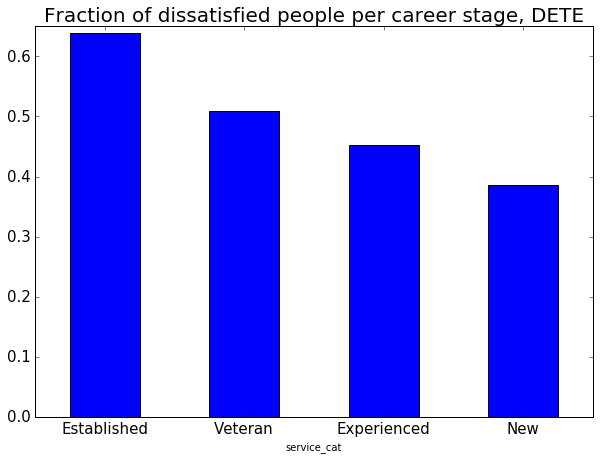

In [96]:
# Creating a pivot table 'dissatisfied_service' for the DETE institute
dete_service = combined[combined['institute'] == 'DETE'].reset_index(drop=True)
dissatisfied_service_dete = dete_service.pivot_table('dissatisfied', 'service_cat')['dissatisfied'].sort_values(ascending=False).to_frame()

# Printing the pivot table
print(dissatisfied_service_dete)

# Visualizing the results
dissatisfied_service_dete.plot(kind='bar', figsize=(10, 7), fontsize=15, ylim=(0,0.65), rot=0, legend=False)
plt.title('Fraction of dissatisfied people per career stage, DETE', fontsize=20)

             dissatisfied
service_cat              
Established      0.333333
Veteran          0.277778
New              0.268657
Experienced      0.250000


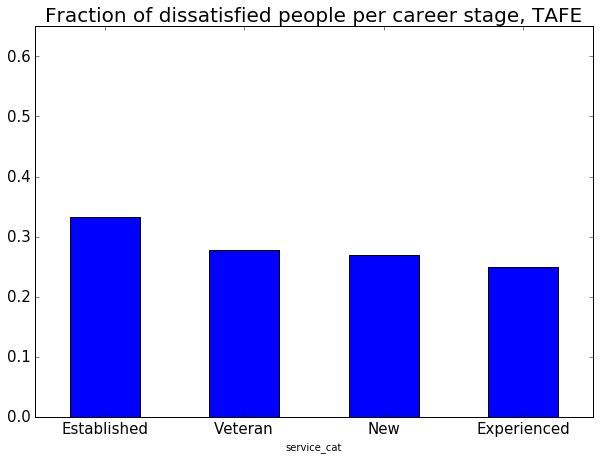

In [97]:
# Creating a pivot table 'dissatisfied_service' for the TAFE institute
tafe_service = combined[combined['institute'] == 'TAFE'].reset_index(drop=True)
dissatisfied_service_tafe = tafe_service.pivot_table('dissatisfied', 'service_cat')['dissatisfied'].sort_values(ascending=False).to_frame()

# Printing the pivot table
print(dissatisfied_service_tafe)

# Visualizing the results
dissatisfied_service_tafe.plot(kind='bar', figsize=(10, 7), fontsize=15, ylim=(0,0.65), rot=0, legend=False)
plt.title('Fraction of dissatisfied people per career stage, TAFE', fontsize=20)

We can clearly see almost the same trend for each institute as the overall one (only with "New" and "Experienced" changed places for the TAFE institute). However, another evident thing is that in the DETE institute the percentage of dissatisfied people is almost twice higher for each category (up to 65%) than for the same categories in the TAFE institute. If we look at the overall percentage of the dissatisfied employees from both istitutes, probably we'll  find an explanation:

In [98]:
combined[combined['institute'] == 'DETE']['dissatisfied'].value_counts()

False    134
True     129
Name: dissatisfied, dtype: int64

In [99]:
combined[combined['institute'] == 'TAFE']['dissatisfied'].value_counts()

False    210
True      77
Name: dissatisfied, dtype: int64

Hence, in general, 49% of all the employees who left the DETE institute did so because of some dissatisfaction issues, while for the TAFE institute the percentage is 27%.
### Calculating the Percentage of Dissatisfied People per Age
#### Overall trend
We'll do now  the same analysis for the `'age_cat'` column.

         dissatisfied
age_cat              
Senior       0.398104
Middle       0.360577
Junior       0.358779


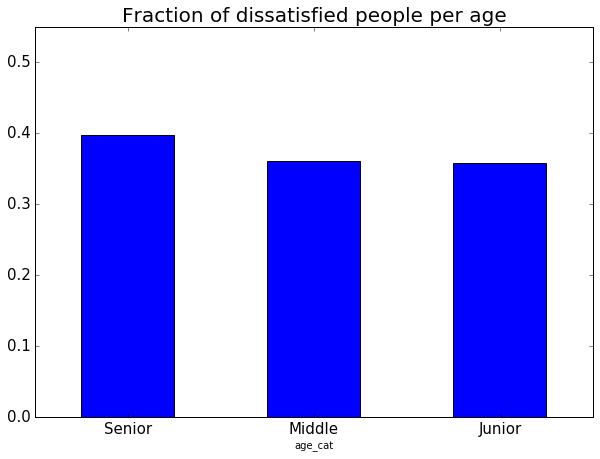

In [100]:
# Creating a pivot table 'dissatisfied_age'
dissatisfied_age = combined.pivot_table('dissatisfied', 'age_cat')['dissatisfied'].sort_values(ascending=False).to_frame()

# Printing the pivot table
print(dissatisfied_age)

# Visualizing the results
dissatisfied_age.plot(kind='bar', figsize=(10, 7), fontsize=15, ylim=(0,0.55), rot=0, legend=False)
plt.title('Fraction of dissatisfied people per age', fontsize=20)

We can observe that age has less influence on being or not dissatisfied when resigning (only 1-3% of difference between the categories). However, the general trend here is that older employees are more likely to be dissatisfied than their yonger colleagues.
#### DETE vs. TAFE
Let's have a closer look at the age trends of each institute separately.

         dissatisfied
age_cat              
Senior       0.523810
Middle       0.474747
Junior       0.457627


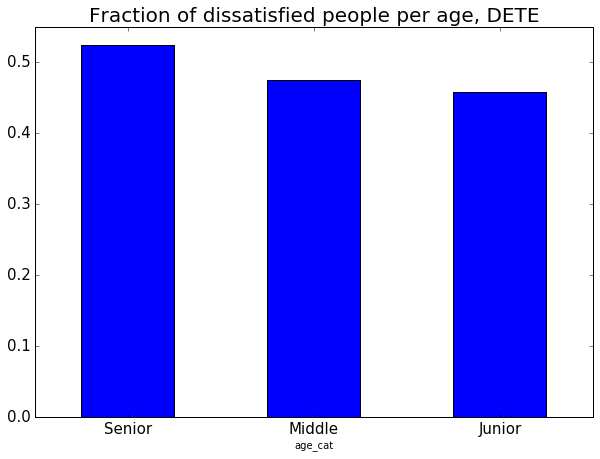

In [101]:
# Creating a pivot table 'dissatisfied_age' for the DETE institute
dete_age = combined[combined['institute'] == 'DETE'].reset_index(drop=True)
dissatisfied_age_dete = dete_age.pivot_table('dissatisfied', 'age_cat')['dissatisfied'].sort_values(ascending=False).to_frame()

# Printing the pivot table
print(dissatisfied_age_dete)

# Visualizing the results
dissatisfied_age_dete.plot(kind='bar', figsize=(10, 7), fontsize=15, ylim=(0,0.55), rot=0, legend=False)
plt.title('Fraction of dissatisfied people per age, DETE', fontsize=20)

         dissatisfied
age_cat              
Junior       0.277778
Senior       0.273585
Middle       0.256881


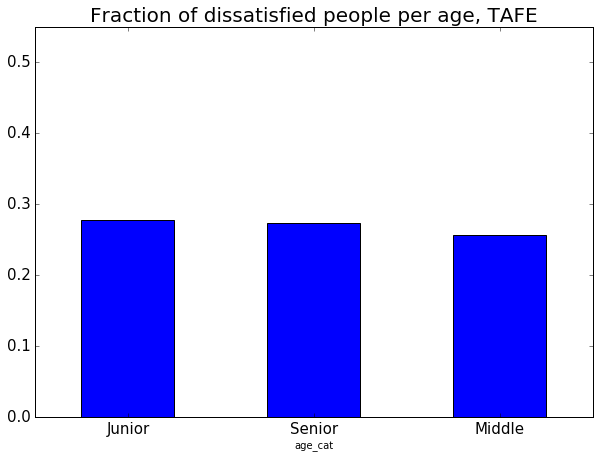

In [102]:
# Creating a pivot table 'dissatisfied_age' for the TAFE institute
tafe_age = combined[combined['institute'] == 'TAFE'].reset_index(drop=True)
dissatisfied_age_tafe = tafe_age.pivot_table('dissatisfied', 'age_cat')['dissatisfied'].sort_values(ascending=False).to_frame()

# Printing the pivot table
print(dissatisfied_age_tafe)

# Visualizing the results
dissatisfied_age_tafe.plot(kind='bar', figsize=(10, 7), fontsize=15, ylim=(0,0.55), rot=0, legend=False)
plt.title('Fraction of dissatisfied people per age, TAFE', fontsize=20)

We see that the overall trend is strongly influenced by the DETE institute data, where once again we have almost twice more dissatisfied people for each category of age than in the TAFE institute. For the latter, the trend is different: junior-senior-middle, in descending order, with an insignificant difference between these categories up to 2%.
## Conclusion
All in all, in this project we've cleaned the employees' exit surveys from 2 Australian institutes, and analyzed the data from the standpoint of relations between resigning from the company because of some kind of dissatisfaction and the age or the length of service. As a result, we can conclude the following:

- The employees who worked in the institute for a longer period are more likely to resign due to dissatisfaction issues (up to 53%) than those who worked for a shorter period (up to 30%).
- The older employees are more likely to resign due to dissatisfaction issues than their yonger colleagues, even though the difference between the categories here is only 1-3%.
- The percentage of dissatisfied employees from the DETE institute is twice higher than from the TAFE. This relation is also represented in percentages for different categories.

In [103]:
combined[combined['position']=='Guidance Officer']

,age,cease_date,dissatisfied,employment_status,gender,id,institute,institute_service,position,service_cat,age_cat
0,41.0,2012.0,True,Permanent Full-time,Female,6.0,DETE,18.0,Guidance Officer,Veteran,Middle
28,41.0,2012.0,True,Permanent Full-time,Female,115.0,DETE,15.0,Guidance Officer,Veteran,Middle
113,41.0,2012.0,True,Permanent Part-time,Female,399.0,DETE,19.0,Guidance Officer,Veteran,Middle
